In [1]:
import re
import string
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup
from collections import Counter
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
df = pd.read_csv('Preprocessed Data.csv')

In [3]:
df.shape

(23046, 13)

In [4]:
df.head(10)

,Airline Name,Overall_Rating,Review,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,preprocessed_review
0,AB Aviation,9.0,Moroni to Moheli. Turned out to be a pretty ...,Economy Class,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes,moroni to moheli turned out to be a pretty dec...
1,AB Aviation,1.0,Moroni to Anjouan. It is a very small airline...,Economy Class,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no,moroni to anjouan it is a very small airline m...
2,AB Aviation,1.0,Anjouan to Dzaoudzi. A very small airline an...,Economy Class,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no,anjouan to dzaoudzi a very small airline and t...
3,Adria Airways,1.0,Please do a favor yourself and do not fly wi...,Economy Class,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no,please do a favor yourself and do not fly with...
4,Adria Airways,1.0,Do not book a flight with this airline! My fr...,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,do not book a flight with this airline my frie...
5,Adria Airways,1.0,Had very bad experience with rerouted and ca...,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,had very bad experience with rerouted and canc...
6,Adria Airways,1.0,"Ljubljana to Zürich. Firstly, Ljubljana airp...",Economy Class,1.0,1.0,1.0,1.0,NaN,NaN,1.0,no,ljubljana to zrich firstly ljubljana airport i...
7,Adria Airways,1.0,"First of all, I am not complaining about a s...",Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,first of all i am not complaining about a spec...
8,Adria Airways,1.0,Worst Airline ever! They combined two flight...,Economy Class,1.0,2.0,1.0,1.0,1.0,1.0,1.0,no,worst airline ever they combined two flight to...
9,Adria Airways,8.0,Ljubljana to Munich. The homebase airport of ...,Economy Class,4.0,4.0,3.0,5.0,NaN,NaN,5.0,yes,ljubljana to munich the homebase airport of ad...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23046 entries, 0 to 23045
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Airline Name            23046 non-null  object 
 1   Overall_Rating          22298 non-null  float64
 2   Review                  23046 non-null  object 
 3   Seat Type               22058 non-null  object 
 4   Seat Comfort            19004 non-null  float64
 5   Cabin Staff Service     18899 non-null  float64
 6   Food & Beverages        14493 non-null  float64
 7   Ground Service          18366 non-null  float64
 8   Inflight Entertainment  10824 non-null  float64
 9   Wifi & Connectivity     5917 non-null   float64
 10  Value For Money         22088 non-null  float64
 11  Recommended             23046 non-null  object 
 12  preprocessed_review     23046 non-null  object 
dtypes: float64(8), object(5)
memory usage: 2.3+ MB


**VADER - Valence Aware Dictionary and sEntiment Reasoner**

In [6]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [7]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [8]:
# Add an 'Id' column starting from 1
df['Id'] = range(1, len(df) + 1)

In [9]:
# Move 'Id' column to the first position
df.insert(0, 'Id', df.pop('Id'))

In [10]:
pd.set_option('display.max_colwidth', 50)
df.head()

,Id,Airline Name,Overall_Rating,Review,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,preprocessed_review
0,1,AB Aviation,9.0,Moroni to Moheli. Turned out to be a pretty ...,Economy Class,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes,moroni to moheli turned out to be a pretty dec...
1,2,AB Aviation,1.0,Moroni to Anjouan. It is a very small airline...,Economy Class,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no,moroni to anjouan it is a very small airline m...
2,3,AB Aviation,1.0,Anjouan to Dzaoudzi. A very small airline an...,Economy Class,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no,anjouan to dzaoudzi a very small airline and t...
3,4,Adria Airways,1.0,Please do a favor yourself and do not fly wi...,Economy Class,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no,please do a favor yourself and do not fly with...
4,5,Adria Airways,1.0,Do not book a flight with this airline! My fr...,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,do not book a flight with this airline my frie...


In [11]:
res = {}
for i, row in df.iterrows():
    text = row['preprocessed_review']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

In [12]:
res = pd.DataFrame(res).T
res = res.reset_index().rename(columns={'index': 'Id'})

res['Id'] = res['Id'].astype(str)
df['Id'] = df['Id'].astype(str)

df = df.merge(res, how='left', on='Id')

In [13]:
df.head()

,Id,Airline Name,Overall_Rating,Review,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,preprocessed_review,neg,neu,pos,compound
0,1,AB Aviation,9.0,Moroni to Moheli. Turned out to be a pretty ...,Economy Class,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes,moroni to moheli turned out to be a pretty dec...,0.000,0.779,0.221,0.9192
1,2,AB Aviation,1.0,Moroni to Anjouan. It is a very small airline...,Economy Class,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no,moroni to anjouan it is a very small airline m...,0.115,0.876,0.009,-0.9242
2,3,AB Aviation,1.0,Anjouan to Dzaoudzi. A very small airline an...,Economy Class,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no,anjouan to dzaoudzi a very small airline and t...,0.031,0.850,0.119,0.7346
3,4,Adria Airways,1.0,Please do a favor yourself and do not fly wi...,Economy Class,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no,please do a favor yourself and do not fly with...,0.200,0.762,0.038,-0.9583
4,5,Adria Airways,1.0,Do not book a flight with this airline! My fr...,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,do not book a flight with this airline my frie...,0.080,0.841,0.079,-0.0418


In [14]:
# Rename the 'compound' column to 'sentiment_score'
df.rename(columns={'compound': 'sentiment_score'}, inplace=True)

In [15]:
df.head()

,Id,Airline Name,Overall_Rating,Review,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,preprocessed_review,neg,neu,pos,sentiment_score
0,1,AB Aviation,9.0,Moroni to Moheli. Turned out to be a pretty ...,Economy Class,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes,moroni to moheli turned out to be a pretty dec...,0.000,0.779,0.221,0.9192
1,2,AB Aviation,1.0,Moroni to Anjouan. It is a very small airline...,Economy Class,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no,moroni to anjouan it is a very small airline m...,0.115,0.876,0.009,-0.9242
2,3,AB Aviation,1.0,Anjouan to Dzaoudzi. A very small airline an...,Economy Class,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no,anjouan to dzaoudzi a very small airline and t...,0.031,0.850,0.119,0.7346
3,4,Adria Airways,1.0,Please do a favor yourself and do not fly wi...,Economy Class,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no,please do a favor yourself and do not fly with...,0.200,0.762,0.038,-0.9583
4,5,Adria Airways,1.0,Do not book a flight with this airline! My fr...,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,do not book a flight with this airline my frie...,0.080,0.841,0.079,-0.0418


In [16]:
df.drop(columns=['neg', 'neu', 'pos'], inplace=True)

In [17]:
df.head()

,Id,Airline Name,Overall_Rating,Review,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,preprocessed_review,sentiment_score
0,1,AB Aviation,9.0,Moroni to Moheli. Turned out to be a pretty ...,Economy Class,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes,moroni to moheli turned out to be a pretty dec...,0.9192
1,2,AB Aviation,1.0,Moroni to Anjouan. It is a very small airline...,Economy Class,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no,moroni to anjouan it is a very small airline m...,-0.9242
2,3,AB Aviation,1.0,Anjouan to Dzaoudzi. A very small airline an...,Economy Class,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no,anjouan to dzaoudzi a very small airline and t...,0.7346
3,4,Adria Airways,1.0,Please do a favor yourself and do not fly wi...,Economy Class,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no,please do a favor yourself and do not fly with...,-0.9583
4,5,Adria Airways,1.0,Do not book a flight with this airline! My fr...,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,do not book a flight with this airline my frie...,-0.0418


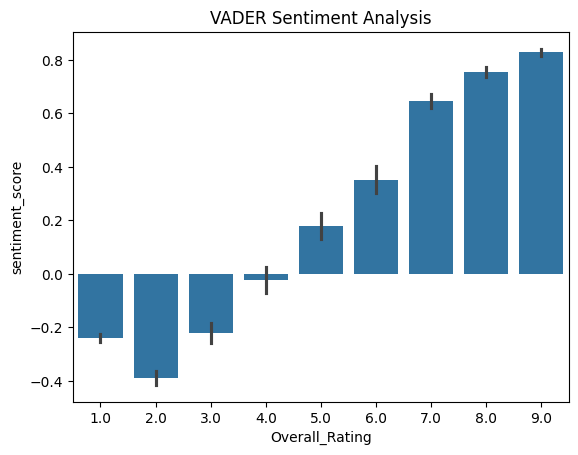

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.barplot(data=df, x='Overall_Rating', y='sentiment_score')
ax.set_title('VADER Sentiment Analysis')
plt.show()

**Data Analysis**

In [19]:
# Count the number of unique values in "Airline Name" column
unique_values_count = df["Airline Name"].nunique()
print(f"Before: Number of unique values in Airline Name: {unique_values_count}")

Before: Number of unique values in Airline Name: 497


In [20]:
# Count the occurrences of each Airline Name
airline_counts = df.groupby("Airline Name")["Airline Name"].transform("count")

# Filter the DataFrame to keep rows where the count is 50 or more
df = df[airline_counts >= 50]

In [21]:
# Count the number of unique values in "Airline Name" column
unique_values_count = df["Airline Name"].nunique()
print(f"After: Number of unique values in Airline Name: {unique_values_count}")

After: Number of unique values in Airline Name: 209


In [22]:
df.shape

(19239, 15)

In [23]:
# Group by "Airline Name" and compute the mean for "sentiment_score"
result = (
    df.groupby("Airline Name")["sentiment_score"]
    .mean()
    .reset_index()
    .sort_values(by="sentiment_score", ascending=False)
)
print(result)

                Airline Name  sentiment_score
62   China Southern Airlines         0.780284
94           Hainan Airlines         0.745736
120             Lao Airlines         0.703203
18                 Air Koryo         0.684311
0     ANA All Nippon Airways         0.634157
..                       ...              ...
91                  Go First        -0.497874
107          Jetblue Airways        -0.507356
197                  Volaris        -0.536416
195                 Viva Air        -0.547867
44                   Avianca        -0.564047

[209 rows x 2 columns]


In [24]:
# Extract top 5 airlines with the highest sentiment_score
top_5_airlines = result.nlargest(5, "sentiment_score")
print(top_5_airlines)

                Airline Name  sentiment_score
62   China Southern Airlines         0.780284
94           Hainan Airlines         0.745736
120             Lao Airlines         0.703203
18                 Air Koryo         0.684311
0     ANA All Nippon Airways         0.634157


In [25]:
# Extract top 5 airlines with the lowest sentiment_score
last_5_airlines = result.nsmallest(5, "sentiment_score")
print(last_5_airlines)

        Airline Name  sentiment_score
44           Avianca        -0.564047
195         Viva Air        -0.547867
197          Volaris        -0.536416
107  Jetblue Airways        -0.507356
91          Go First        -0.497874


In [26]:
# Calculate the correlation matrix
columns_of_interest = ["sentiment_score", "Seat Comfort", "Cabin Staff Service", "Food & Beverages", "Ground Service", "Inflight Entertainment", "Wifi & Connectivity", "Value For Money"]
correlation_matrix = df[columns_of_interest].corr()

# Extract the correlation of each column with sentiment_score
correlation_with_sentiment = correlation_matrix["sentiment_score"].sort_values(ascending=False)
print(correlation_with_sentiment)

sentiment_score           1.000000
Value For Money           0.664227
Ground Service            0.661268
Cabin Staff Service       0.606364
Food & Beverages          0.605089
Seat Comfort              0.583950
Wifi & Connectivity       0.521282
Inflight Entertainment    0.472864
Name: sentiment_score, dtype: float64


**Common Theme**

In [27]:
negative_reviews = df[df["sentiment_score"] < 0]["Review"]
positive_reviews = df[df["sentiment_score"] > 0]["Review"]

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_words(reviews, num_top_words=500):
    # Initialize CountVectorizer
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words="english", ngram_range=(2, 2))

    # Vectorize the reviews
    dtm = vectorizer.fit_transform(reviews)

    # Get the word frequencies
    word_frequencies = dtm.sum(axis=0).A1  # Sum across all rows (documents)

    # Map words to their frequencies
    words = vectorizer.get_feature_names_out()
    word_freq_dict = dict(zip(words, word_frequencies))

    # Sort the dictionary by frequency in descending order
    top_words = sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True)[:num_top_words]

    return top_words

In [29]:
# Get top words for positive and negative reviews
top_positive_words = get_top_words(positive_reviews, num_top_words=500)
top_negative_words = get_top_words(negative_reviews, num_top_words=500)

# Print top 20 words
print("Top words in positive reviews:")
for word, freq in top_positive_words[:20]:
    print(f"{word}: {freq}")

print("\nTop words in negative reviews:")
for word, freq in top_negative_words[:20]:
    print(f"{word}: {freq}")

Top words in positive reviews:
cabin crew: 1519
business class: 1233
customer service: 918
flight attendants: 650
return flight: 475
hour flight: 455
leg room: 454
flight time: 451
ground staff: 400
hong kong: 372
crew friendly: 359
flight delayed: 358
economy class: 343
low cost: 337
inflight entertainment: 328
flight attendant: 304
short flight: 303
seats comfortable: 296
staff friendly: 293
premium economy: 280

Top words in negative reviews:
customer service: 2693
flight delayed: 1136
business class: 800
worst airline: 717
connecting flight: 695
return flight: 681
flight cancelled: 666
cabin crew: 519
delayed hours: 514
boarding pass: 444
flight attendants: 430
booked flight: 407
worst experience: 407
ground staff: 404
hour flight: 380
hours flight: 354
cancelled flight: 346
flight attendant: 329
30 minutes: 319
fly airline: 317


In [30]:
from wordcloud import WordCloud

def generate_wordcloud(reviews, title="Word Cloud", num_top_words=500):
    # Get the top words
    top_words = get_top_words(reviews, num_top_words)

    # Create a dictionary for WordCloud
    word_freq_dict = dict(top_words)

    # Generate the WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_dict)

    # Plot the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title)
    plt.axis('off')
    plt.show()

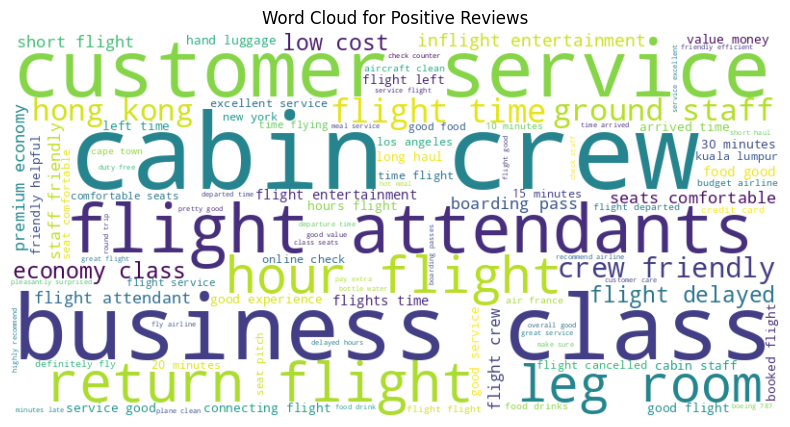

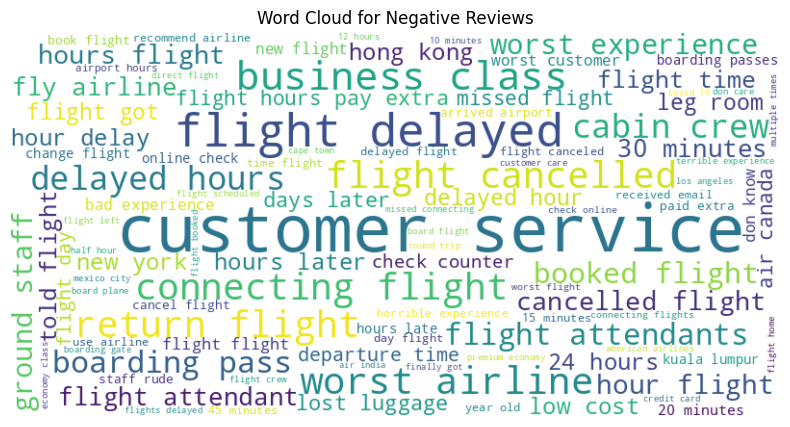

In [31]:
# Generate WordCloud for positive and negative reviews
generate_wordcloud(positive_reviews, title="Word Cloud for Positive Reviews", num_top_words=100)
generate_wordcloud(negative_reviews, title="Word Cloud for Negative Reviews", num_top_words=100)